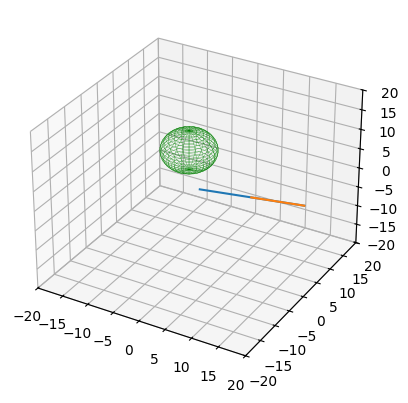

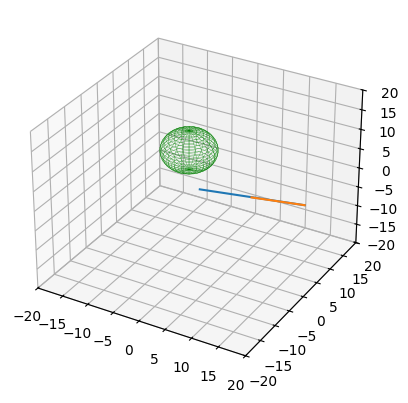

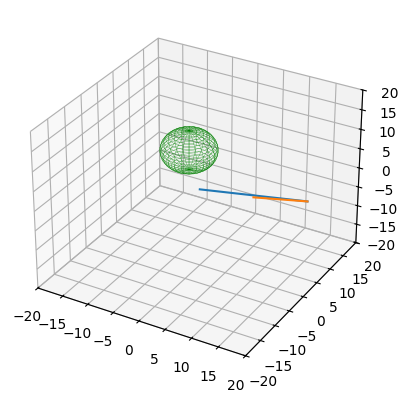

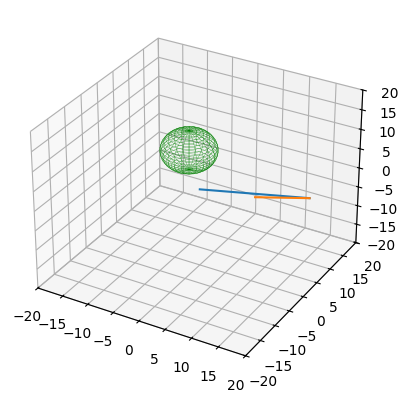

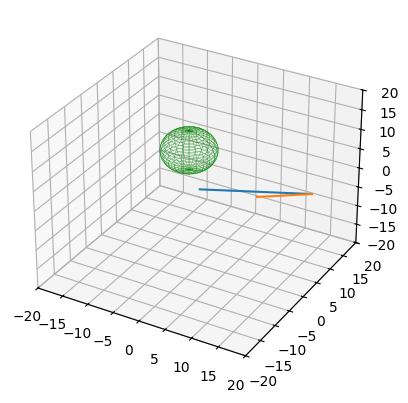

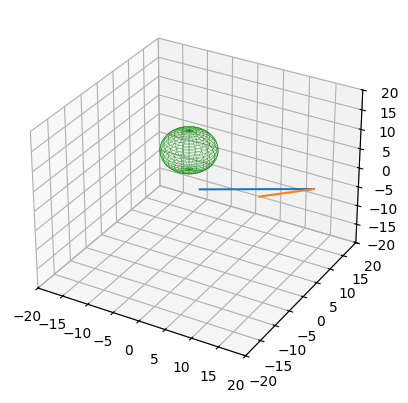

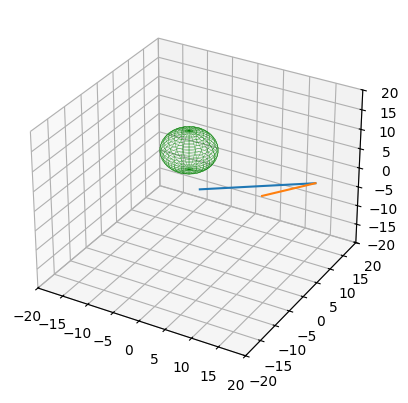

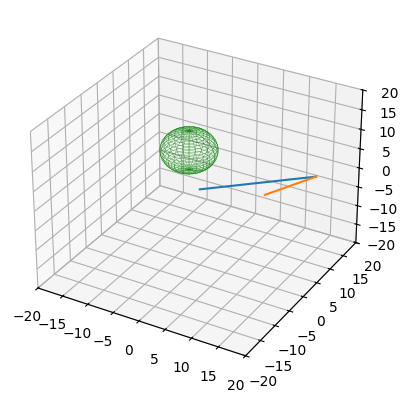

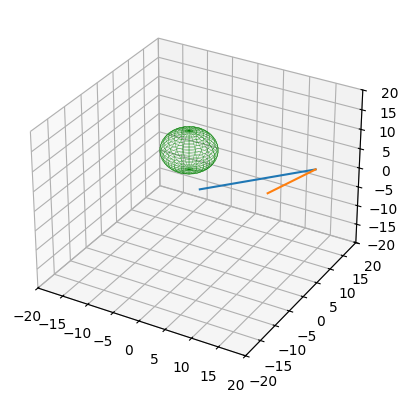

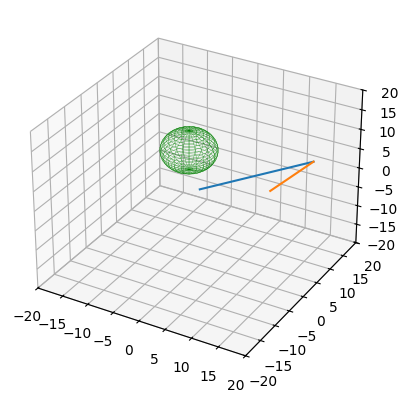

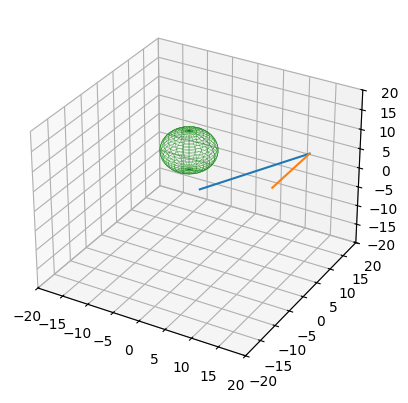

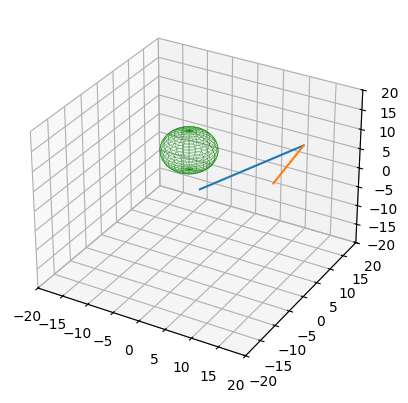

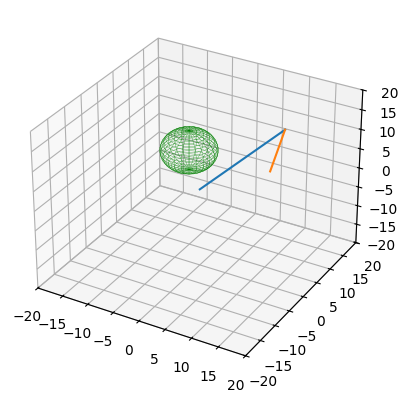

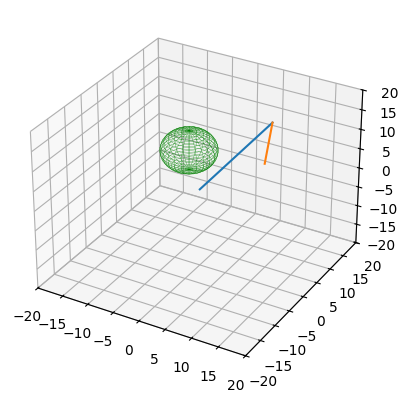

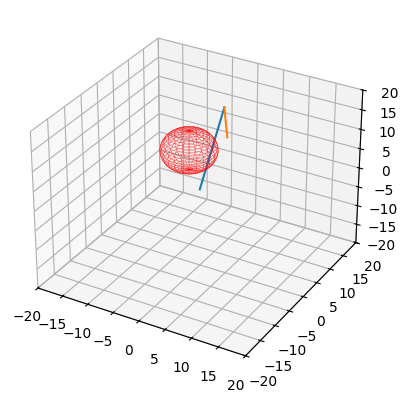

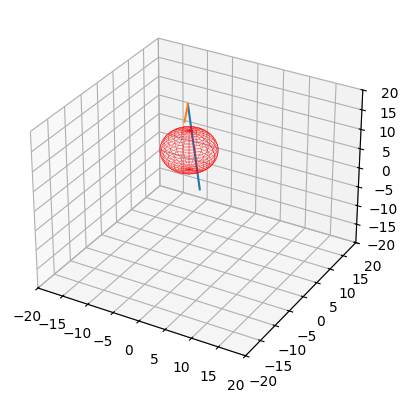

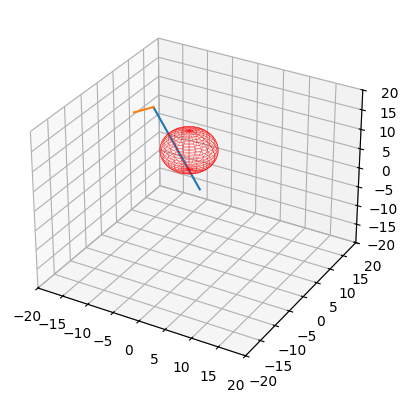

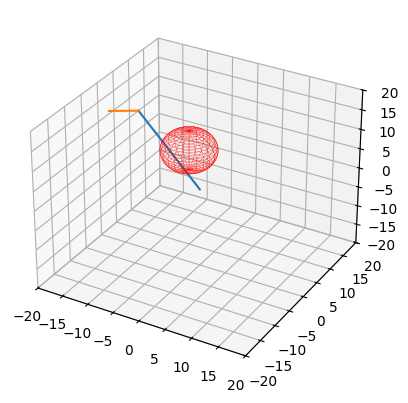

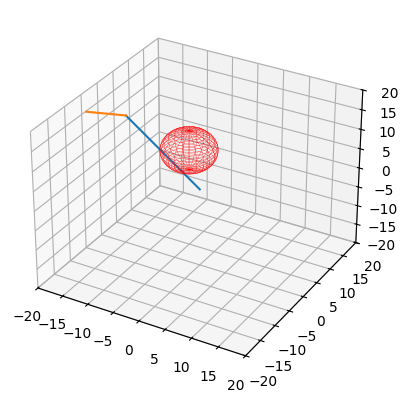

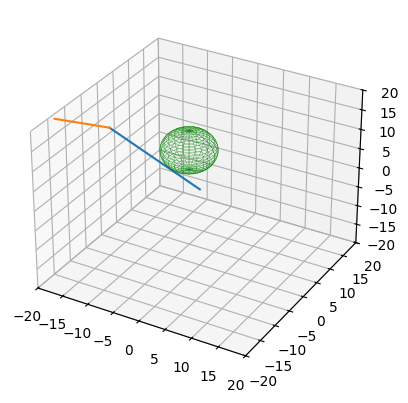

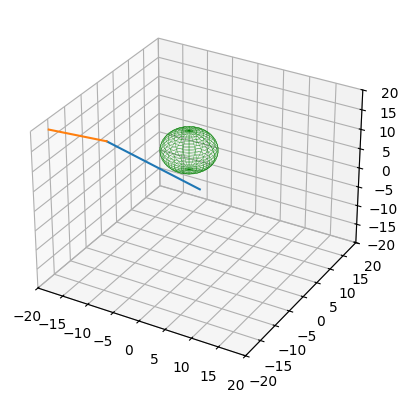

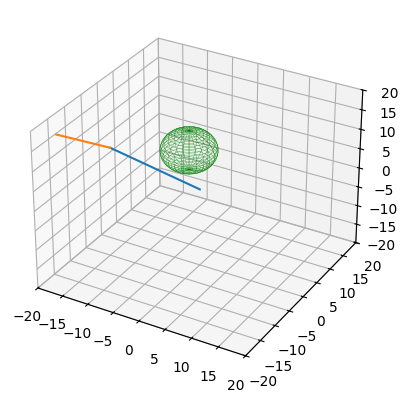

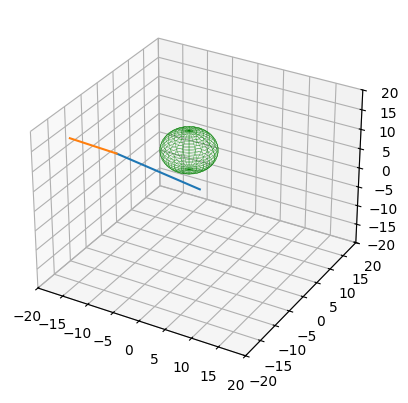

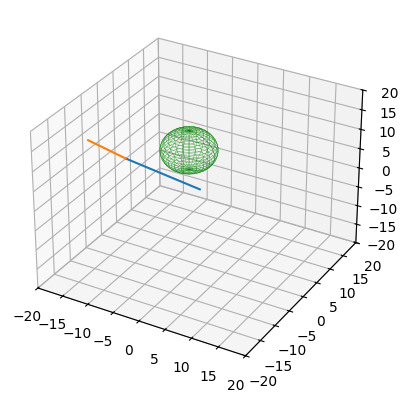

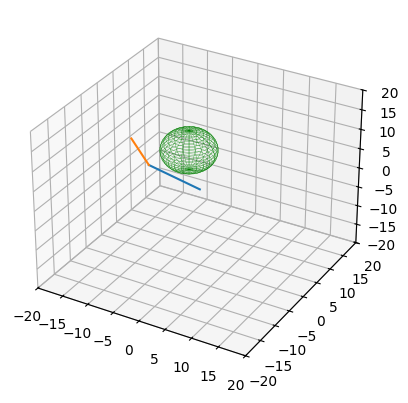

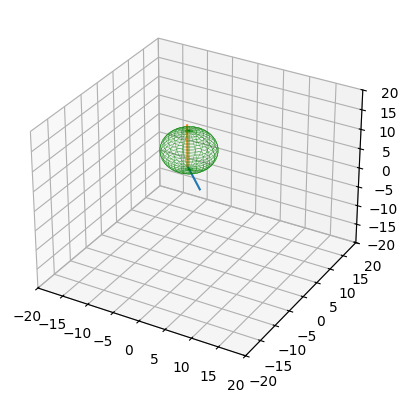

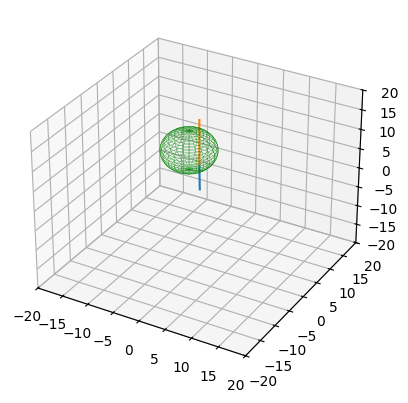

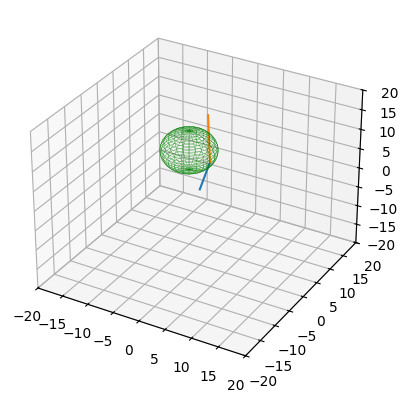

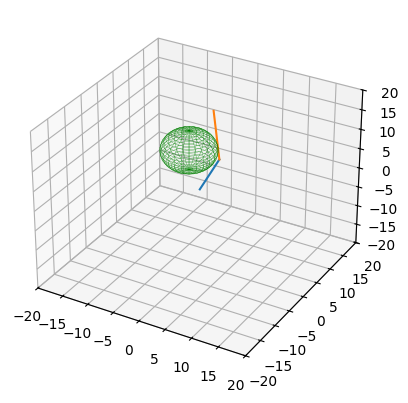

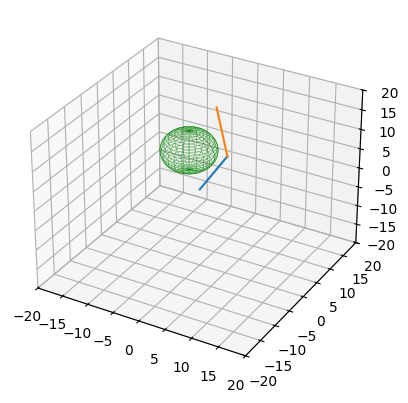

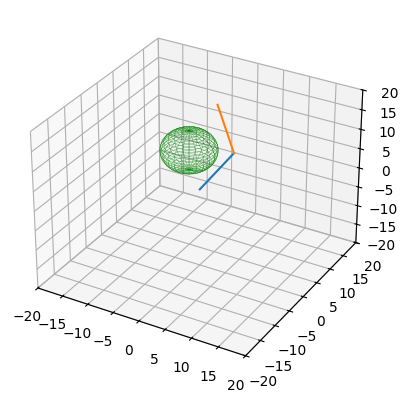

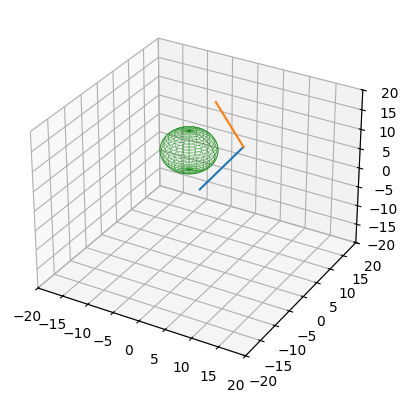

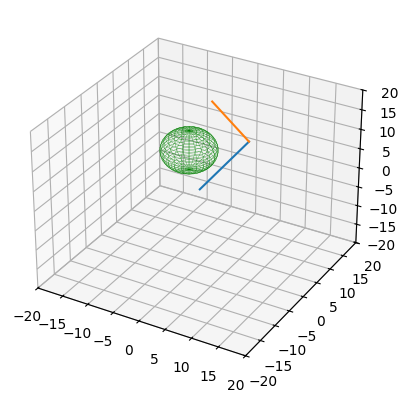

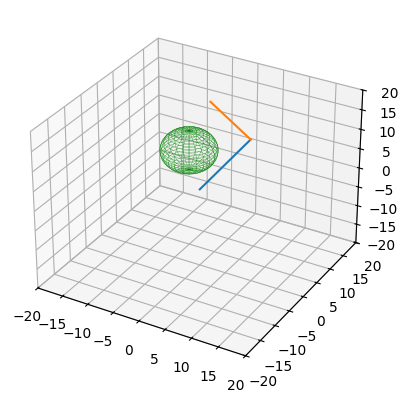

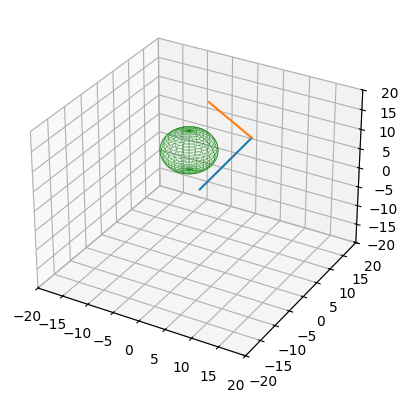

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#angles theta, phi, alpha
ai= [0, 10, -180]
af = [360, 60, 90]
l1, l2 = 20, 10
tf = 10

#ang = at3 + bt2 + ct + d
coef = []
i=0
while i<3 :
    x = np.array([[0, 0, 0, 1], [tf*tf*tf, tf*tf, tf, 1], [0, 0, 1, 0], [3*tf*tf, 2*tf, 1, 0]])
    y = np.array([ai[i], af[i], 0, 0])
    coef.append(np.linalg.solve(x,y))
    i += 1

def f(coef,i , t):
    return t*t*t*coef[i][0] + t*t*coef[i][1] + t*coef[i][2] + coef[i][3]

time = np.arange(0, tf, 0.2)
theta1, theta2, theta3 = [], [], []
for t in time :
    theta1.append(np.radians(f(coef, 0, t)))
    theta2.append(np.radians(f(coef, 1, t)))
    theta3.append(np.radians(f(coef, 2, t)))
plt.plot(time, theta1, label='Theta1')
plt.plot(time, theta2, label='Theta2')
plt.plot(time, theta3, label='Theta3')
plt.xlabel('Time (s)')
plt.ylabel('Angle (radians)')
plt.title('Robot Arm Joint Angles Over Time')
plt.legend()
plt.show()

i = 0
P1 = []
P2 = []
for t in time :
  x1 = l1*np.cos(theta1[i])*np.cos(theta2[i])
  y1 = l1*np.sin(theta1[i])*np.cos(theta2[i])
  z1 = l1*np.sin(theta2[i])
  x2 = x1 + l2*np.cos(theta1[i])*np.cos(theta2[i] + theta3[i])
  y2 = y1 + l2*np.sin(theta1[i])*np.cos(theta2[i] + theta3[i])
  z2 = z1 + l2*np.sin(theta2[i] + theta3[i])
  P1.append([x1, y1, z1])
  P2.append([x2, y2, z2])
  i +=1
P1 = np.array(P1)
P2 = np.array(P2)

obj = np.array([-5, 5, 5])
obj_r = 5
u = np.linspace(0, 2 * np.pi, 25)
v = np.linspace(0, np.pi, 25)
x_obj = obj[0] + obj_r*np.outer(np.cos(u), np.sin(v))
y_obj = obj[1] + obj_r*np.outer(np.sin(u), np.sin(v))
z_obj = obj[2] + obj_r*np.outer(np.ones(np.size(u)), np.cos(v))

def collide(p1, p2, obj, obj_r):
    i=0
    while i<11 :
        if(np.linalg.norm(obj - p1*i/10) <= obj_r):
            return 1
        if(np.linalg.norm(obj - ((p2-p1)*i/10 + p1)) <= obj_r) :
            return 1
        i += 1
    return 0

i=0
for t in time :
    plt.clf()
    ax = plt.axes(projection='3d')
    ax.set_xlim3d(-20, 20)
    ax.set_ylim3d(-20, 20)
    ax.set_zlim3d(-20, 20)
    ax.plot([0,P1[i][0]], [0,P1[i][1]], [0,P1[i][2]])
    ax.plot([P1[i][0], P2[i][0]], [P1[i][1], P2[i][1]], [P1[i][2], P2[i][2]])
    if collide(P1[i],P2[i],obj,obj_r) :
        ax.plot_wireframe(x_obj, y_obj, z_obj, linewidth=0.2, color='r')
    else :
        ax.plot_wireframe(x_obj, y_obj, z_obj, linewidth=0.2, color='g')

    plt.pause(0.1)
    i += 1
plt.show()